Nama kolom dalam dataset:
Index(['ID Variant', 'category', 'name', 'Brand Name', 'Basic - Price',
       'In Stock', 'Track Stock', 'Track Alert', 'Track Cost', 'Cost Amount'],
      dtype='object')

5 data pertama:
   ID Variant         category                  name Brand Name  \
0    97069882    tembakau mole             madu gold  Unbranded   
1    97069889    tembakau mole            madu prima  Unbranded   
2    97069893    tembakau mole           madu silver  Unbranded   
3    97071033    tembakau mole  gunting kuning kecil  Unbranded   
4    97254100  rokok sampoerna     sampoerna mild 12  Unbranded   

   Basic - Price  In Stock Track Stock Track Alert Track Cost  Cost Amount  
0           8000         1         Yes         Yes        Yes       5000.0  
1          13000         1         Yes         Yes        Yes       8600.0  
2          13000         1         Yes         Yes        Yes       8600.0  
3           8000        10         Yes         Yes        Yes       5212.

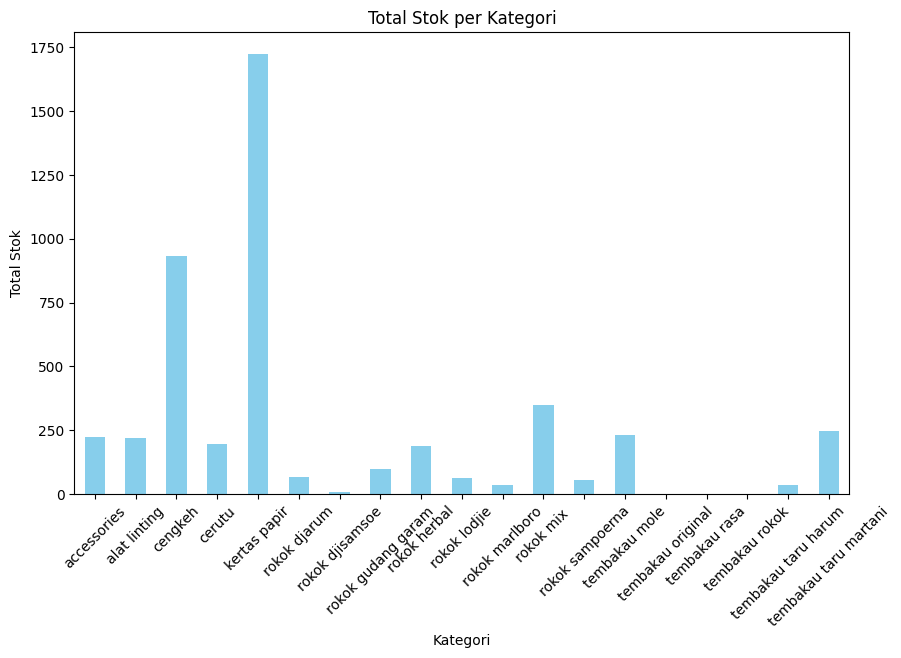

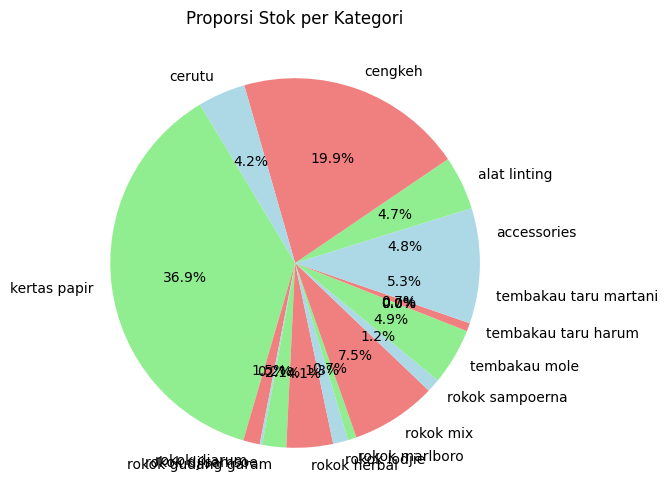

Missing values:
ID Variant       0
category         0
name             0
Brand Name       0
Basic - Price    0
In Stock         0
Track Stock      0
Track Alert      0
Track Cost       0
Cost Amount      5
dtype: int64

Duplikat data:
0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def main():
    # Coba memuat dataset CSV dengan penanganan kesalahan, serta menggunakan delimiter yang sesuai
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')  # Menambahkan delimiter
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Tampilkan nama-nama kolom untuk memverifikasi apakah kolom yang diperlukan ada
    print("Nama kolom dalam dataset:")
    print(df.columns)

    # Tampilkan 5 data pertama dan 5 data terakhir
    print("\n5 data pertama:")
    print(df.head())
    print("\n5 data terakhir:")
    print(df.tail())

    # Tampilkan jumlah produk secara keseluruhan
    jumlah_produk = len(df)
    print(f"\nJumlah produk: {jumlah_produk}")

    # Verifikasi apakah kolom 'category', 'name', dan 'In Stock' atau 'penjualan' ada dalam dataset sebelum melanjutkan
    if 'category' in df.columns and 'name' in df.columns:
        # Kelompokkan data berdasarkan kategori dan hitung total produk per kategori
        total_produk_per_kategori = df.groupby('category')['name'].count()
        print("\nTotal produk per kategori:")
        print(total_produk_per_kategori)

        # Menghitung total stok atau penjualan per kategori
        if 'In Stock' in df.columns:  # Menghitung total stok per kategori
            total_stok_per_kategori = df.groupby('category')['In Stock'].sum()
            print("\nTotal stok per kategori:")
            print(total_stok_per_kategori)

            # Hapus nilai negatif jika ada
            total_stok_per_kategori = total_stok_per_kategori[total_stok_per_kategori >= 0]

            # Visualisasi: Bar chart total stok per kategori
            plt.figure(figsize=(10, 6))
            total_stok_per_kategori.plot(kind='bar', color='skyblue')
            plt.title('Total Stok per Kategori')
            plt.xlabel('Kategori')
            plt.ylabel('Total Stok')
            plt.xticks(rotation=45)
            plt.show()

            # Visualisasi: Pie chart proporsi stok per kategori
            plt.figure(figsize=(8, 6))
            total_stok_per_kategori.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
            plt.title('Proporsi Stok per Kategori')
            plt.ylabel('')
            plt.show()

        elif 'penjualan' in df.columns:  # Menghitung total penjualan per kategori
            total_penjualan_per_kategori = df.groupby('category')['penjualan'].sum()
            print("\nTotal penjualan per kategori:")
            print(total_penjualan_per_kategori)

            # Hapus nilai negatif jika ada
            total_penjualan_per_kategori = total_penjualan_per_kategori[total_penjualan_per_kategori >= 0]

            # Visualisasi: Bar chart total penjualan per kategori
            plt.figure(figsize=(10, 6))
            total_penjualan_per_kategori.plot(kind='bar', color='lightgreen')
            plt.title('Total Penjualan per Kategori')
            plt.xlabel('Kategori')
            plt.ylabel('Total Penjualan')
            plt.xticks(rotation=45)
            plt.show()

            # Visualisasi: Pie chart proporsi penjualan per kategori
            plt.figure(figsize=(8, 6))
            total_penjualan_per_kategori.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
            plt.title('Proporsi Penjualan per Kategori')
            plt.ylabel('')
            plt.show()

    else:
        print("\nKolom 'category' atau 'name' tidak ditemukan dalam dataset.")
        return

    # Tugas 2: Analisis Data dengan Statistik Deskriptif
    if 'penjualan' in df.columns:
        print(f"Rata-rata penjualan: {df['penjualan'].mean()}")
        print(f"Median penjualan: {df['penjualan'].median()}")
        print(f"Modus penjualan: {df['penjualan'].mode()[0]}")
        print(f"Standar deviasi penjualan: {df['penjualan'].std()}")

        # Membuat box plot penjualan
        df['penjualan'].plot(kind='box', figsize=(8, 6))
        plt.title('Distribusi Penjualan')
        plt.xlabel('Penjualan')
        plt.show()

    # Tugas 4: Analisis Harga Produk
    if 'harga' in df.columns:  # Pastikan kolom 'harga' ada
        print(f"\nRata-rata harga: {df['harga'].mean()}")
        print(f"Median harga: {df['harga'].median()}")
        print(f"Modus harga: {df['harga'].mode()[0]}")
        print(f"Standar deviasi harga: {df['harga'].std()}")

        # Membuat box plot harga
        df['harga'].plot(kind='box', figsize=(8, 6))
        plt.title('Distribusi Harga Produk')
        plt.xlabel('Harga')
        plt.show()

    # Tugas 3: Membersihkan Data

    # Cek missing values
    print("Missing values:")
    print(df.isna().sum())

    # Hapus data dengan missing values
    df = df.dropna()

    # Ganti missing values dengan nilai rata-rata (jika diperlukan)
    if 'penjualan' in df.columns:
        df['penjualan'] = df['penjualan'].fillna(df['penjualan'].mean())
    if 'harga' in df.columns:
        df['harga'] = df['harga'].fillna(df['harga'].mean())

    # Cek duplikat data
    print("\nDuplikat data:")
    print(df.duplicated().sum())

    # Hapus duplikat data
    df = df.drop_duplicates()

# Memanggil fungsi main
if __name__ == "__main__":
    main()


Nama kolom dalam dataset:
Index(['ID Variant', 'category', 'name', 'Brand Name', 'Basic - Price',
       'In Stock', 'Track Stock', 'Track Alert', 'Track Cost', 'Cost Amount'],
      dtype='object')

5 data pertama:
   ID Variant         category                  name Brand Name  \
0    97069882    tembakau mole             madu gold  Unbranded   
1    97069889    tembakau mole            madu prima  Unbranded   
2    97069893    tembakau mole           madu silver  Unbranded   
3    97071033    tembakau mole  gunting kuning kecil  Unbranded   
4    97254100  rokok sampoerna     sampoerna mild 12  Unbranded   

   Basic - Price  In Stock Track Stock Track Alert Track Cost  Cost Amount  
0           8000         1         Yes         Yes        Yes       5000.0  
1          13000         1         Yes         Yes        Yes       8600.0  
2          13000         1         Yes         Yes        Yes       8600.0  
3           8000        10         Yes         Yes        Yes       5212.

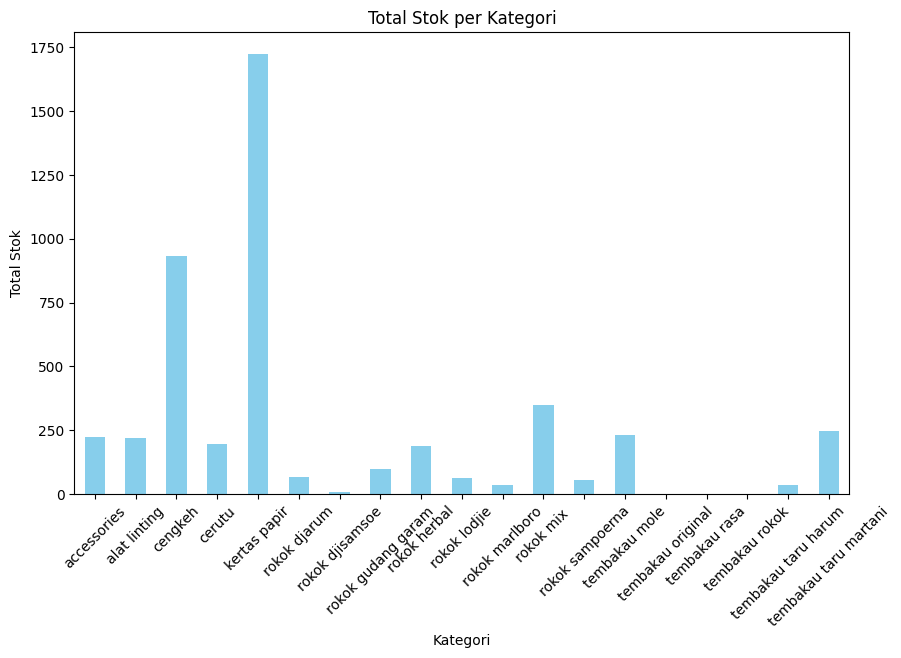

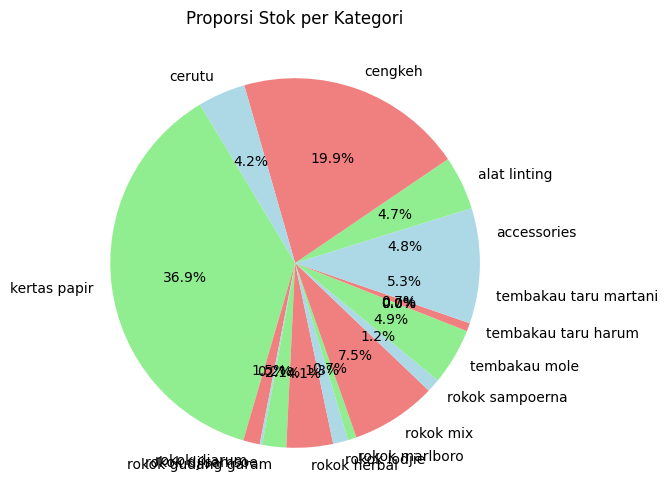

Missing values:
ID Variant       0
category         0
name             0
Brand Name       0
Basic - Price    0
In Stock         0
Track Stock      0
Track Alert      0
Track Cost       0
Cost Amount      5
dtype: int64

Duplikat data:
0
Distribusi data per kluster:
cluster
0    376
1    203
2      1
Name: count, dtype: int64


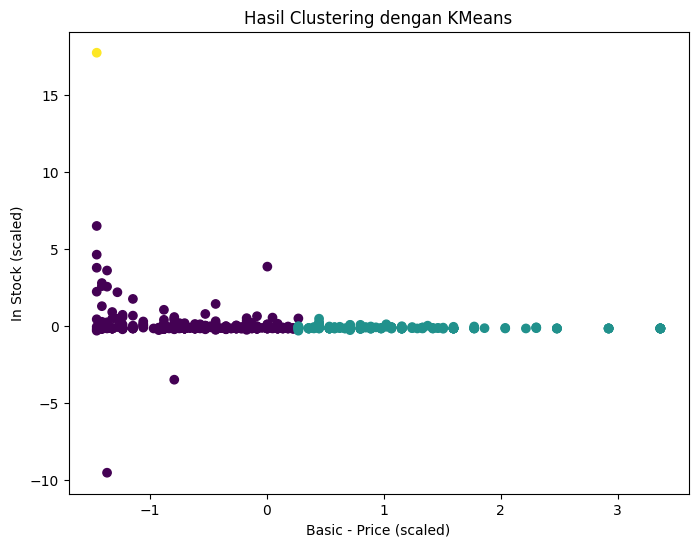

Akurasi klasifikasi stok: 78.74%


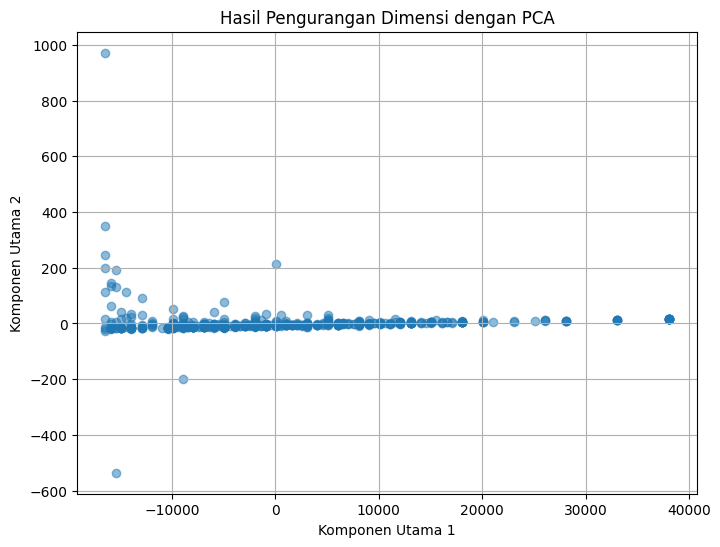

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def main():
    # Coba memuat dataset CSV dengan penanganan kesalahan, serta menggunakan delimiter yang sesuai
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')  # Menambahkan delimiter
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Tampilkan nama-nama kolom untuk memverifikasi apakah kolom yang diperlukan ada
    print("Nama kolom dalam dataset:")
    print(df.columns)

    # Tampilkan 5 data pertama dan 5 data terakhir
    print("\n5 data pertama:")
    print(df.head())
    print("\n5 data terakhir:")
    print(df.tail())

    # Tampilkan jumlah produk secara keseluruhan
    jumlah_produk = len(df)
    print(f"\nJumlah produk: {jumlah_produk}")

    # Verifikasi apakah kolom 'category', 'name', dan 'In Stock' atau 'penjualan' ada dalam dataset sebelum melanjutkan
    if 'category' in df.columns and 'name' in df.columns:
        # Kelompokkan data berdasarkan kategori dan hitung total produk per kategori
        total_produk_per_kategori = df.groupby('category')['name'].count()
        print("\nTotal produk per kategori:")
        print(total_produk_per_kategori)

        # Menghitung total stok atau penjualan per kategori
        if 'In Stock' in df.columns:  # Menghitung total stok per kategori
            total_stok_per_kategori = df.groupby('category')['In Stock'].sum()
            print("\nTotal stok per kategori:")
            print(total_stok_per_kategori)

            # Hapus nilai negatif jika ada
            total_stok_per_kategori = total_stok_per_kategori[total_stok_per_kategori >= 0]

            # Visualisasi: Bar chart total stok per kategori
            plt.figure(figsize=(10, 6))
            total_stok_per_kategori.plot(kind='bar', color='skyblue')
            plt.title('Total Stok per Kategori')
            plt.xlabel('Kategori')
            plt.ylabel('Total Stok')
            plt.xticks(rotation=45)
            plt.show()

            # Visualisasi: Pie chart proporsi stok per kategori
            plt.figure(figsize=(8, 6))
            total_stok_per_kategori.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
            plt.title('Proporsi Stok per Kategori')
            plt.ylabel('')
            plt.show()

        elif 'penjualan' in df.columns:  # Menghitung total penjualan per kategori
            total_penjualan_per_kategori = df.groupby('category')['penjualan'].sum()
            print("\nTotal penjualan per kategori:")
            print(total_penjualan_per_kategori)

            # Hapus nilai negatif jika ada
            total_penjualan_per_kategori = total_penjualan_per_kategori[total_penjualan_per_kategori >= 0]

            # Visualisasi: Bar chart total penjualan per kategori
            plt.figure(figsize=(10, 6))
            total_penjualan_per_kategori.plot(kind='bar', color='lightgreen')
            plt.title('Total Penjualan per Kategori')
            plt.xlabel('Kategori')
            plt.ylabel('Total Penjualan')
            plt.xticks(rotation=45)
            plt.show()

            # Visualisasi: Pie chart proporsi penjualan per kategori
            plt.figure(figsize=(8, 6))
            total_penjualan_per_kategori.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
            plt.title('Proporsi Penjualan per Kategori')
            plt.ylabel('')
            plt.show()

    else:
        print("\nKolom 'category' atau 'name' tidak ditemukan dalam dataset.")
        return

    # Tugas 2: Analisis Data dengan Statistik Deskriptif
    if 'penjualan' in df.columns:
        print(f"Rata-rata penjualan: {df['penjualan'].mean()}")
        print(f"Median penjualan: {df['penjualan'].median()}")
        print(f"Modus penjualan: {df['penjualan'].mode()[0]}")
        print(f"Standar deviasi penjualan: {df['penjualan'].std()}")

        # Membuat box plot penjualan
        df['penjualan'].plot(kind='box', figsize=(8, 6))
        plt.title('Distribusi Penjualan')
        plt.xlabel('Penjualan')
        plt.show()

    # Tugas 4: Analisis Harga Produk
    if 'harga' in df.columns:  # Pastikan kolom 'harga' ada
        print(f"\nRata-rata harga: {df['harga'].mean()}")
        print(f"Median harga: {df['harga'].median()}")
        print(f"Modus harga: {df['harga'].mode()[0]}")
        print(f"Standar deviasi harga: {df['harga'].std()}")

        # Membuat box plot harga
        df['harga'].plot(kind='box', figsize=(8, 6))
        plt.title('Distribusi Harga Produk')
        plt.xlabel('Harga')
        plt.show()

    # Tugas 3: Membersihkan Data

    # Cek missing values
    print("Missing values:")
    print(df.isna().sum())

    # Hapus data dengan missing values
    df = df.dropna()

    # Ganti missing values dengan nilai rata-rata (jika diperlukan)
    if 'penjualan' in df.columns:
        df['penjualan'] = df['penjualan'].fillna(df['penjualan'].mean())
    if 'harga' in df.columns:
        df['harga'] = df['harga'].fillna(df['harga'].mean())

    # Cek duplikat data
    print("\nDuplikat data:")
    print(df.duplicated().sum())

    # Hapus duplikat data
    df = df.drop_duplicates()

# Memanggil fungsi main
if __name__ == "__main__":
    main()

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def clustering_data(df):
    # Memilih kolom numerik yang tersedia untuk clustering
    if 'Basic - Price' in df.columns and 'In Stock' in df.columns:
        # Menggunakan hanya kolom numerik yang relevan untuk clustering
        data = df[['Basic - Price', 'In Stock']].fillna(0)  # Mengisi NaN dengan 0
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)

        # Menerapkan KMeans
        kmeans = KMeans(n_clusters=3, random_state=42)
        df['cluster'] = kmeans.fit_predict(data_scaled)

        # Menampilkan hasil clustering
        print("Distribusi data per kluster:")
        print(df['cluster'].value_counts())

        # Visualisasi
        plt.figure(figsize=(8, 6))
        plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['cluster'], cmap='viridis')
        plt.xlabel('Basic - Price (scaled)')
        plt.ylabel('In Stock (scaled)')
        plt.title('Hasil Clustering dengan KMeans')
        plt.show()
    else:
        print("Kolom yang dibutuhkan untuk clustering tidak ada.")

def main():
    # Memuat dataset
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Pastikan df terdefinisi sebelum dipanggil dalam clustering_data
    clustering_data(df)

if __name__ == "__main__":
    main()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def classification_data(df):
    # Menyiapkan label berdasarkan stok (misalnya, 0 untuk rendah, 1 untuk tinggi)
    df['stock_label'] = (df['In Stock'] > 5).astype(int)
    
    # Memilih fitur untuk klasifikasi
    features = ['Basic - Price', 'Cost Amount']
    X = df[features].fillna(0)  # Mengisi NaN dengan 0 jika diperlukan
    y = df['stock_label']
    
    # Membagi data menjadi training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Menggunakan Decision Tree untuk klasifikasi
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    
    # Prediksi dan akurasi
    y_pred = clf.predict(X_test)
    print(f"Akurasi klasifikasi stok: {accuracy_score(y_test, y_pred) * 100:.2f}%")

def main():
    # Memuat dataset
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Memanggil fungsi klasifikasi setelah data dimuat
    classification_data(df)

# Memanggil fungsi main
if __name__ == "__main__":
    main()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pengurangan_dimensi(df):
    # Memilih kolom numerik yang relevan untuk PCA
    features = ['Basic - Price', 'In Stock']  # Ubah sesuai kolom numerik yang ada di dataset Anda
    X = df[features].fillna(0)

    # Menerapkan PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualisasi hasil PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title('Hasil Pengurangan Dimensi dengan PCA')
    plt.xlabel('Komponen Utama 1')
    plt.ylabel('Komponen Utama 2')
    plt.grid()
    plt.show()

# Pastikan Anda memanggil fungsi ini setelah memuat dataset
if __name__ == "__main__":
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
        pengurangan_dimensi(df)
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

def analisis_asosiasi(df):
    # Pastikan kolom 'name' ada dan berisi data
    if 'name' not in df.columns or df['name'].isnull().all():
        print("Kolom 'name' tidak ditemukan atau tidak ada data.")
        return

    # Konversi data ke format yang sesuai untuk analisis asosiasi
    transactions = df['name'].str.get_dummies(sep=',')
    
    # Periksa apakah ada data untuk analisis asosiasi
    if transactions.empty:
        print("Tidak ada data untuk analisis asosiasi.")
        return

    # Menghitung frekuensi item
    frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)
    
    # Cek apakah frequent itemsets kosong
    if frequent_itemsets.empty:
        print("Tidak ada itemset yang memenuhi kriteria min_support.")
        return

    # Menghitung aturan asosiasi
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

    # Tampilkan hasil
    if rules.empty:
        print("Tidak ada aturan asosiasi yang memenuhi kriteria.")
    else:
        print("\nAturan Asosiasi:")
        print(rules)

def main():
    # Memuat dataset
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
        analisis_asosiasi(df)  # Panggil analisis asosiasi setelah memuat dataset
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")

# Memanggil fungsi main
if __name__ == "__main__":
    main()


Tidak ada itemset yang memenuhi kriteria min_support.


c:\Users\Asus_\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


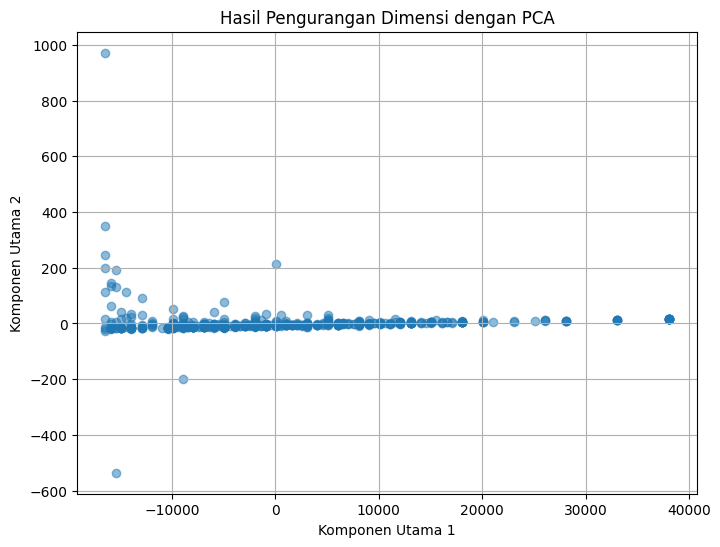

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pengurangan_dimensi(df):
    # Memilih kolom numerik yang relevan untuk PCA
    features = ['Basic - Price', 'In Stock']  # Ubah sesuai kolom numerik yang ada di dataset Anda
    X = df[features].fillna(0)

    # Menerapkan PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualisasi hasil PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title('Hasil Pengurangan Dimensi dengan PCA')
    plt.xlabel('Komponen Utama 1')
    plt.ylabel('Komponen Utama 2')
    plt.grid()
    plt.show()

# Pastikan Anda memanggil fungsi ini setelah memuat dataset
if __name__ == "__main__":
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
        pengurangan_dimensi(df)
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")


Distribusi data per kluster:
cluster
0    376
1    203
2      1
Name: count, dtype: int64


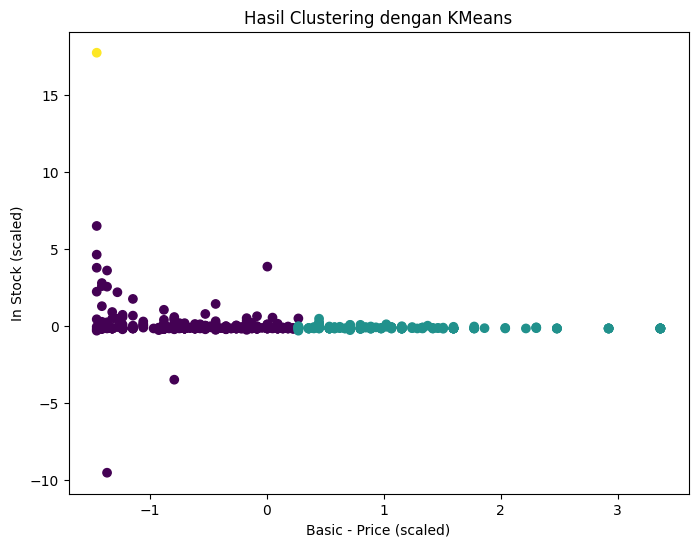

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def clustering_data(df):
    # Memilih kolom numerik yang tersedia untuk clustering
    if 'Basic - Price' in df.columns and 'In Stock' in df.columns:
        # Menggunakan hanya kolom numerik yang relevan untuk clustering
        data = df[['Basic - Price', 'In Stock']].fillna(0)  # Mengisi NaN dengan 0
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)

        # Menerapkan KMeans
        kmeans = KMeans(n_clusters=3, random_state=42)
        df['cluster'] = kmeans.fit_predict(data_scaled)

        # Menampilkan hasil clustering
        print("Distribusi data per kluster:")
        print(df['cluster'].value_counts())

        # Visualisasi
        plt.figure(figsize=(8, 6))
        plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=df['cluster'], cmap='viridis')
        plt.xlabel('Basic - Price (scaled)')
        plt.ylabel('In Stock (scaled)')
        plt.title('Hasil Clustering dengan KMeans')
        plt.show()
    else:
        print("Kolom yang dibutuhkan untuk clustering tidak ada.")

def main():
    # Memuat dataset
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Pastikan df terdefinisi sebelum dipanggil dalam clustering_data
    clustering_data(df)

if __name__ == "__main__":
    main()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def classification_data(df):
    # Menyiapkan label berdasarkan stok (misalnya, 0 untuk rendah, 1 untuk tinggi)
    df['stock_label'] = (df['In Stock'] > 5).astype(int)
    
    # Memilih fitur untuk klasifikasi
    features = ['Basic - Price', 'Cost Amount']
    X = df[features].fillna(0)  # Mengisi NaN dengan 0 jika diperlukan
    y = df['stock_label']
    
    # Membagi data menjadi training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Menggunakan Decision Tree untuk klasifikasi
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    
    # Prediksi dan akurasi
    y_pred = clf.predict(X_test)
    print(f"Akurasi klasifikasi stok: {accuracy_score(y_test, y_pred) * 100:.2f}%")

def main():
    # Memuat dataset
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Memanggil fungsi klasifikasi setelah data dimuat
    classification_data(df)

# Memanggil fungsi main
if __name__ == "__main__":
    main()


Akurasi klasifikasi stok: 78.74%


Nama kolom dalam dataset:
Index(['ID Variant', 'category', 'name', 'Brand Name', 'Basic - Price',
       'In Stock', 'Track Stock', 'Track Alert', 'Track Cost', 'Cost Amount'],
      dtype='object')

5 data pertama:
   ID Variant         category                  name Brand Name  \
0    97069882    tembakau mole             madu gold  Unbranded   
1    97069889    tembakau mole            madu prima  Unbranded   
2    97069893    tembakau mole           madu silver  Unbranded   
3    97071033    tembakau mole  gunting kuning kecil  Unbranded   
4    97254100  rokok sampoerna     sampoerna mild 12  Unbranded   

   Basic - Price  In Stock Track Stock Track Alert Track Cost  Cost Amount  
0           8000         1         Yes         Yes        Yes       5000.0  
1          13000         1         Yes         Yes        Yes       8600.0  
2          13000         1         Yes         Yes        Yes       8600.0  
3           8000        10         Yes         Yes        Yes       5212.

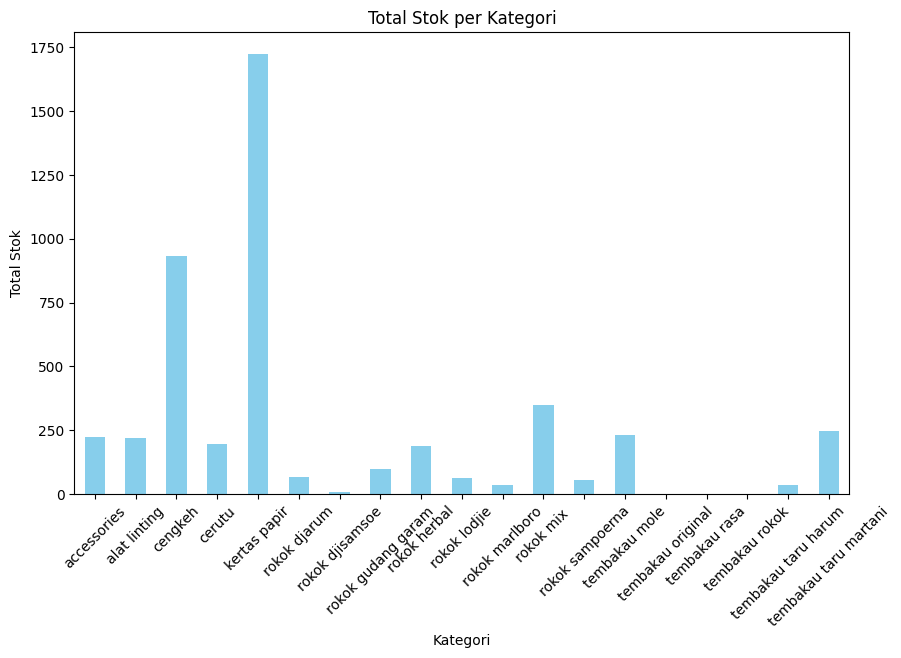

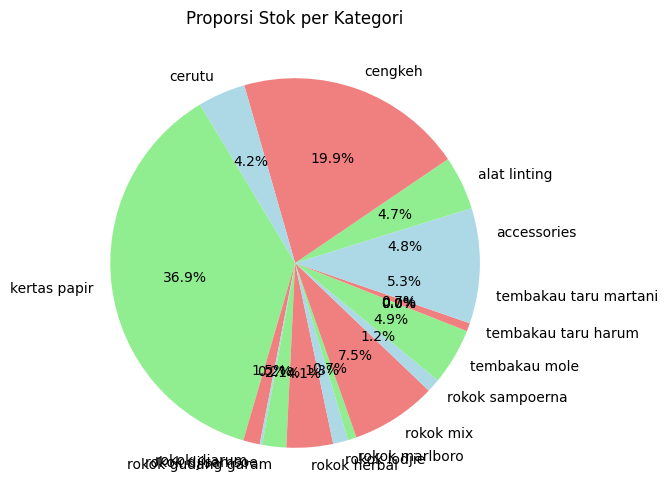

Missing values:
ID Variant       0
category         0
name             0
Brand Name       0
Basic - Price    0
In Stock         0
Track Stock      0
Track Alert      0
Track Cost       0
Cost Amount      5
dtype: int64

Duplikat data:
0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def main():
    # Coba memuat dataset CSV dengan penanganan kesalahan, serta menggunakan delimiter yang sesuai
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')  # Menambahkan delimiter
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Tampilkan nama-nama kolom untuk memverifikasi apakah kolom yang diperlukan ada
    print("Nama kolom dalam dataset:")
    print(df.columns)

    # Tampilkan 5 data pertama dan 5 data terakhir
    print("\n5 data pertama:")
    print(df.head())
    print("\n5 data terakhir:")
    print(df.tail())

    # Tampilkan jumlah produk secara keseluruhan
    jumlah_produk = len(df)
    print(f"\nJumlah produk: {jumlah_produk}")

    # Verifikasi apakah kolom 'category', 'name', dan 'In Stock' atau 'penjualan' ada dalam dataset sebelum melanjutkan
    if 'category' in df.columns and 'name' in df.columns:
        # Kelompokkan data berdasarkan kategori dan hitung total produk per kategori
        total_produk_per_kategori = df.groupby('category')['name'].count()
        print("\nTotal produk per kategori:")
        print(total_produk_per_kategori)

        # Menghitung total stok atau penjualan per kategori
        if 'In Stock' in df.columns:  # Menghitung total stok per kategori
            total_stok_per_kategori = df.groupby('category')['In Stock'].sum()
            print("\nTotal stok per kategori:")
            print(total_stok_per_kategori)

            # Hapus nilai negatif jika ada
            total_stok_per_kategori = total_stok_per_kategori[total_stok_per_kategori >= 0]

            # Visualisasi: Bar chart total stok per kategori
            plt.figure(figsize=(10, 6))
            total_stok_per_kategori.plot(kind='bar', color='skyblue')
            plt.title('Total Stok per Kategori')
            plt.xlabel('Kategori')
            plt.ylabel('Total Stok')
            plt.xticks(rotation=45)
            plt.show()

            # Visualisasi: Pie chart proporsi stok per kategori
            plt.figure(figsize=(8, 6))
            total_stok_per_kategori.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
            plt.title('Proporsi Stok per Kategori')
            plt.ylabel('')
            plt.show()

        elif 'penjualan' in df.columns:  # Menghitung total penjualan per kategori
            total_penjualan_per_kategori = df.groupby('category')['penjualan'].sum()
            print("\nTotal penjualan per kategori:")
            print(total_penjualan_per_kategori)

            # Hapus nilai negatif jika ada
            total_penjualan_per_kategori = total_penjualan_per_kategori[total_penjualan_per_kategori >= 0]

            # Visualisasi: Bar chart total penjualan per kategori
            plt.figure(figsize=(10, 6))
            total_penjualan_per_kategori.plot(kind='bar', color='lightgreen')
            plt.title('Total Penjualan per Kategori')
            plt.xlabel('Kategori')
            plt.ylabel('Total Penjualan')
            plt.xticks(rotation=45)
            plt.show()

            # Visualisasi: Pie chart proporsi penjualan per kategori
            plt.figure(figsize=(8, 6))
            total_penjualan_per_kategori.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
            plt.title('Proporsi Penjualan per Kategori')
            plt.ylabel('')
            plt.show()

    else:
        print("\nKolom 'category' atau 'name' tidak ditemukan dalam dataset.")
        return

    # Tugas 2: Analisis Data dengan Statistik Deskriptif
    if 'penjualan' in df.columns:
        print(f"Rata-rata penjualan: {df['penjualan'].mean()}")
        print(f"Median penjualan: {df['penjualan'].median()}")
        print(f"Modus penjualan: {df['penjualan'].mode()[0]}")
        print(f"Standar deviasi penjualan: {df['penjualan'].std()}")

        # Membuat box plot penjualan
        df['penjualan'].plot(kind='box', figsize=(8, 6))
        plt.title('Distribusi Penjualan')
        plt.xlabel('Penjualan')
        plt.show()

    # Tugas 4: Analisis Harga Produk
    if 'harga' in df.columns:  # Pastikan kolom 'harga' ada
        print(f"\nRata-rata harga: {df['harga'].mean()}")
        print(f"Median harga: {df['harga'].median()}")
        print(f"Modus harga: {df['harga'].mode()[0]}")
        print(f"Standar deviasi harga: {df['harga'].std()}")

        # Membuat box plot harga
        df['harga'].plot(kind='box', figsize=(8, 6))
        plt.title('Distribusi Harga Produk')
        plt.xlabel('Harga')
        plt.show()

    # Tugas 3: Membersihkan Data

    # Cek missing values
    print("Missing values:")
    print(df.isna().sum())

    # Hapus data dengan missing values
    df = df.dropna()

    # Ganti missing values dengan nilai rata-rata (jika diperlukan)
    if 'penjualan' in df.columns:
        df['penjualan'] = df['penjualan'].fillna(df['penjualan'].mean())
    if 'harga' in df.columns:
        df['harga'] = df['harga'].fillna(df['harga'].mean())

    # Cek duplikat data
    print("\nDuplikat data:")
    print(df.duplicated().sum())

    # Hapus duplikat data
    df = df.drop_duplicates()

# Memanggil fungsi main
if __name__ == "__main__":
    main()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_price(df):
    # Analisis Harga
    if 'harga' in df.columns:
        print("\n--- Analisis Harga Produk ---")
        # Menghitung rata-rata, median, modus, dan standar deviasi
        rata_rata_harga = df['harga'].mean()
        median_harga = df['harga'].median()
        modus_harga = df['harga'].mode()[0]
        std_dev_harga = df['harga'].std()

        # Menampilkan hasil analisis
        print(f"Rata-rata harga: {rata_rata_harga:.2f}")
        print(f"Median harga: {median_harga:.2f}")
        print(f"Modus harga: {modus_harga:.2f}")
        print(f"Standar deviasi harga: {std_dev_harga:.2f}")

        # Membuat box plot untuk visualisasi distribusi harga
        plt.figure(figsize=(10, 6))
        df['harga'].plot(kind='box', color='skyblue')
        plt.title('Distribusi Harga Produk')
        plt.ylabel('Harga')
        plt.grid()
        plt.show()
    else:
        print("\nKolom 'harga' tidak ditemukan dalam dataset.")

def main():
    # Coba memuat dataset CSV dengan penanganan kesalahan, serta menggunakan delimiter yang sesuai
    try:
        df = pd.read_csv('penjualan_tembakau.csv', delimiter=';')  # Menambahkan delimiter
    except FileNotFoundError:
        print("File 'penjualan_tembakau.csv' tidak ditemukan.")
        return

    # Tampilkan nama-nama kolom untuk memverifikasi apakah kolom yang diperlukan ada
    print("Nama kolom dalam dataset:")
    print(df.columns)

    # Tampilkan 5 data pertama dan 5 data terakhir
    print("\n5 data pertama:")
    print(df.head())
    print("\n5 data terakhir:")
    print(df.tail())

    # Memanggil fungsi untuk menganalisis harga
    analyze_price(df)

# Memanggil fungsi main
if __name__ == "__main__":
    main()


Nama kolom dalam dataset:
Index(['ID Variant', 'category', 'name', 'Brand Name', 'Basic - Price',
       'In Stock', 'Track Stock', 'Track Alert', 'Track Cost', 'Cost Amount'],
      dtype='object')

5 data pertama:
   ID Variant         category                  name Brand Name  \
0    97069882    tembakau mole             madu gold  Unbranded   
1    97069889    tembakau mole            madu prima  Unbranded   
2    97069893    tembakau mole           madu silver  Unbranded   
3    97071033    tembakau mole  gunting kuning kecil  Unbranded   
4    97254100  rokok sampoerna     sampoerna mild 12  Unbranded   

   Basic - Price  In Stock Track Stock Track Alert Track Cost  Cost Amount  
0           8000         1         Yes         Yes        Yes       5000.0  
1          13000         1         Yes         Yes        Yes       8600.0  
2          13000         1         Yes         Yes        Yes       8600.0  
3           8000        10         Yes         Yes        Yes       5212.